# Evaluation pipeline

Note:

- We are exploring how LLMs could assist humans to be more creative. To do so, we are exploring how LLMs are creative compared to humans, by evaluating their creativity along specific dimensions on the AUT. Do humans and LLMs have common patterns of creativity ? Is there some differences ? How could they complement each other ?

**GOAL:**

Design a full pipeline for multi-dimensional evaluation of the outputs of a given combination of prompt & LLM for the AUT. 

Inputs:

- outputs of a model with originality and elaboration for the 4 objects for
    - a given LLM (GPTs, open-source models)
    - a given prompt (simple, Few shot prompting, Chain of Thought prompting, ...., RAG)

Ouput:

- graphs, radar charts (1 per object)


### TODO:

- implement a function for elaboration ++

    - elaboration 1: count number of words ✅
    - elaboration 2: count number of words and remove stop words ✅
    - elaboration 3: compute a score with PoS tagging: see with nltk. PoS = technique that involves assigning specific grammatical categories or labels (such as nouns, verbs, adjectives, adverbs, pronouns, etc.) to individual words within a sentence. Idea: a sentence with a lot of adverbs and different verbs is more elaborate that a sentence with one noun and one verb.

- implement a function for flexibility = breadth of categories you cover with your ideas

    - quite linked to similarity measure...
        - see paCy or gensim for word embeddings and similarity calculation.
    - Automated metrics to assess diversity of ideas: BLEU or ROUGE
    - more specifically with topic modelling: gensim or scikit-learn for topic modeling (e.g., LDA = Latent Dirichlet Allocation, LSA = Latent Semantic Analysis, NMF = Non-negative Matrix Factorization).
    - Compute the information entropy of word distributions within sentences.
    - Measure the lexical richness or complexity of sentences: textstats
    - sentence embeddings and compare distances: transformers

Question: Originality and elaboration are sentence-level evaluation. Is it the same for flexibility ?
    - if yes: need to compute a individual score 
    - if no: topic modeling and clusterization easier with multiple data points

<!-- HTML table for benchmark evaluation -->
<table style="border-collapse: collapse; width: 100%; border: 1px solid black;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 8px; border: 1px solid black; text-align: left;">LLM</th>
            <th style="padding: 8px; border: 1px solid black; text-align: left;">Prompt</th>
            <th style="padding: 8px; border: 1px solid black; text-align: left;">Mean Originality</th>
            <th style="padding: 8px; border: 1px solid black; text-align: left;">Std Originality</th>
            <th style="padding: 8px; border: 1px solid black; text-align: left;">Elaboration</th>
            <th style="padding: 8px; border: 1px solid black; text-align: left;">Flexibility</th>
        </tr>
    </thead>
    <tbody>
        <!-- Row 1 -->
        <tr>
            <td style="padding: 8px; border: 1px solid black;">GPT-3.5</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
        </tr>
        <!-- Row 2 -->
        <tr>
            <td style="padding: 8px; border: 1px solid black;">GPT-3.5</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
        </tr>
        <!-- Row 3 -->
        <tr>
            <td style="padding: 8px; border: 1px solid black;">GPT-4</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
        </tr>
        <!-- Row 4 -->
        <tr>
            <td style="padding: 8px; border: 1px solid black;">GPT-4</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
        </tr>
        <!-- Row 5 -->
        <tr>
            <td style="padding: 8px; border: 1px solid black;">Mistral</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
            <td style="padding: 8px; border: 1px solid black;">...</td>
        </tr>


In [40]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from utils_benchmark import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load data

In [2]:
# Humans
#humans = pd.read_csv('./../data/humans_top4_objects.csv')
humans = pd.read_csv('./data_ocsai/data_for_server/humans_sim.csv')

# GPT-3.5
#gpt_35_100 = pd.read_csv('./data_ocsai/merged_df/ocsai_eval_merged_gpt_35_100.csv')
gpt_35_100 = pd.read_csv('./data_ocsai/data_for_server/gpt_35_sim.csv')

# GPT-4
#gpt_4_100 = pd.read_csv('./data_ocsai/merged_df/ocsai_eval_merged_gpt_4_100.csv')
gpt_4_100 = pd.read_csv('./data_ocsai/data_for_server/gpt_4_sim.csv')

# Mistral
#mistral = pd.read_csv('./data_ocsai/mistral/ocsai_eval_merged_mistral_30.csv')
mistral = pd.read_csv('./data_ocsai/data_for_server/mistral_sim.csv')

# Vicuna
vicuna = pd.read_csv('./data_ocsai/data_for_server/vicuna_sim.csv')

objects = list(humans['prompt'].value_counts().head(4).index)

# print length of each dataset
print('Humans:', len(humans))
print('GPT-3.5:', len(gpt_35_100))
print('GPT-4:', len(gpt_4_100))
print('Mistral:', len(mistral))

Humans: 10985
GPT-3.5: 323
GPT-4: 360
Mistral: 120


In [3]:
display(humans.head(1), gpt_35_100.head(1), gpt_4_100.head(1), mistral.head(1))

,prompt,response,originality,elaboration,cosine_dist
0,rope,use it to tie up a bicycle,1.9,7,0.238301


,prompt,response,originality,elaboration,cosine_dist
0,box,Use it as a makeshift stool for reaching high ...,1.7,10.0,0.191882


,prompt,response,originality,elaboration,cosine_dist
0,box,Transform it into a mini garden for succulents.,3.0,8.0,0.239228


,prompt,response,originality,elaboration,cosine_dist
0,brick,Use it as a doorstop,1.0,5,0.203654


## Compute Elaboration

In [4]:
data = {"humans": humans, "gpt_35": gpt_35_100, "gpt_4": gpt_4_100, "mistral": mistral, "vicuna": vicuna}

for name, df in data.items():
    df = elaboration_SW(df)

display(humans.head(1), gpt_35_100.head(1), gpt_4_100.head(1), mistral.head(1), vicuna.head(1))

,prompt,response,originality,elaboration,cosine_dist,elaboration_SW
0,rope,use it to tie up a bicycle,1.9,7,0.238301,3


,prompt,response,originality,elaboration,cosine_dist,elaboration_SW
0,box,Use it as a makeshift stool for reaching high ...,1.7,10.0,0.191882,7


,prompt,response,originality,elaboration,cosine_dist,elaboration_SW
0,box,Transform it into a mini garden for succulents.,3.0,8.0,0.239228,5


,prompt,response,originality,elaboration,cosine_dist,elaboration_SW
0,brick,Use it as a doorstop,1.0,5,0.203654,2


,prompt,response,originality,elaboration,cosine_dist,elaboration_SW
0,brick,Use it as a doorstop,1.0,5.0,0.155539,2


## Compute Flexibility

In [20]:
# to add here (as been done before on server)

## Visualization

- histplots
- kdeplots
- Radar charts: see code from this [website](https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html)

# Overall radar chart

Question: Which model performs better and along which dimensions ?

In [5]:
# normalize 
combined_data = pd.concat([
    humans.assign(dataset='Humans'),
    gpt_35_100.assign(dataset='GPT-3.5'),
    gpt_4_100.assign(dataset='GPT-4'),
    mistral.assign(dataset='Mistral'),
    vicuna.assign(dataset='Vicuna')
])

combined_data_norm = normalization_1(combined_data, check_norm = False)

In [6]:
combined_data_norm.head()

,prompt,response,originality,elaboration,cosine_dist,elaboration_SW,dataset
0,rope,use it to tie up a bicycle,0.225,0.122449,0.395887,0.130435,Humans
1,rope,steps,0.075,0.000000,0.487642,0.043478,Humans
2,rope,dog toy,0.100,0.020408,0.441120,0.086957,Humans
3,box,use it to reach something,0.175,0.081633,0.479723,0.130435,Humans
4,brick,strength tester (punching),0.425,0.040816,0.528945,0.217391,Humans


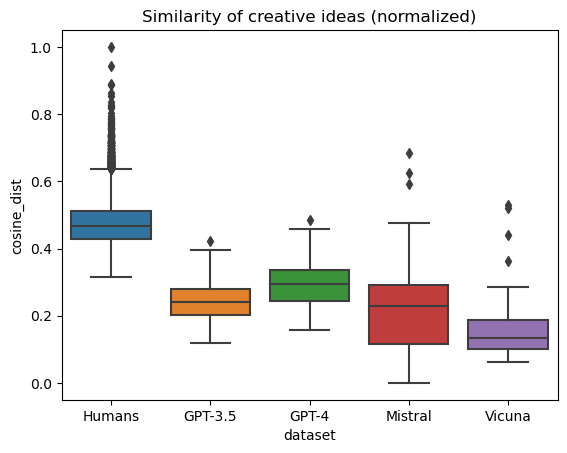

In [7]:
sns.boxplot(data=combined_data_norm, x='dataset', y='cosine_dist')
plt.title("Similarity of creative ideas (normalized)")
plt.show()

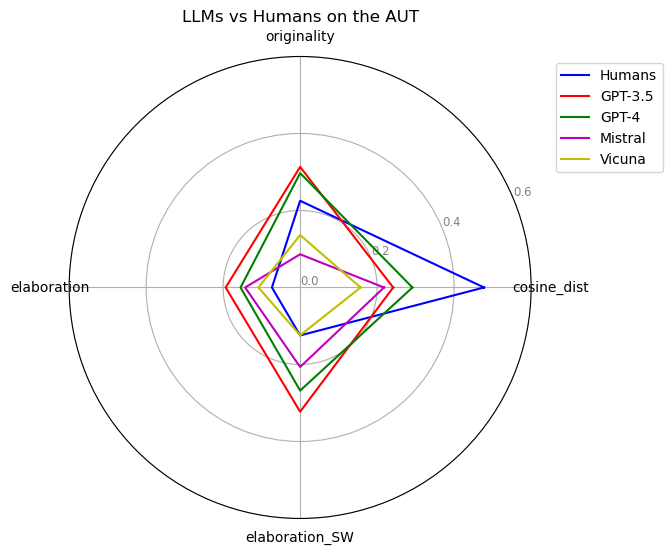

In [15]:
#features = ['prompt', 'originality', 'elaboration', 'elaboration_SW', 'cosine_dist']
features = ['prompt', 'cosine_dist', 'originality', 'elaboration', 'elaboration_SW']

humans_norm = combined_data_norm[combined_data_norm['dataset'] == 'Humans']
gpt_35_norm = combined_data_norm[combined_data_norm['dataset'] == 'GPT-3.5']
gpt_4_norm = combined_data_norm[combined_data_norm['dataset'] == 'GPT-4']
mistral_norm = combined_data_norm[combined_data_norm['dataset'] == 'Mistral']
vicuna_norm = combined_data_norm[combined_data_norm['dataset'] == 'Vicuna']

# List of dataframes and corresponding titles
dataframes = [humans_norm[features], gpt_35_norm[features], gpt_4_norm[features], mistral_norm[features], vicuna_norm[features]]
titles = ['Humans', 'GPT-3.5', 'GPT-4', 'Mistral', 'Vicuna']

# Plot radar chart for multiple dataframes
plot_radar_chart(dataframes, titles, avg_per_object = True)

# Radar charts per object

Question: Given an object, how are humans and LLMs performing ? Is it different and how ? (along which dimensions ?)

In [16]:
# combine the data for each object and normalize across all models

brick_data = pd.concat([
    humans[humans['prompt'] == 'brick'].assign(dataset='Humans'),
    gpt_35_100[gpt_35_100['prompt'] == 'brick'].assign(dataset='GPT-3.5'),
    gpt_4_100[gpt_4_100['prompt'] == 'brick'].assign(dataset='GPT-4'),
    mistral[mistral['prompt'] == 'brick'].assign(dataset='Mistral'),
    vicuna[vicuna['prompt'] == 'brick'].assign(dataset='Vicuna')
])
box_data = pd.concat([
    humans[humans['prompt'] == 'box'].assign(dataset='Humans'),
    gpt_35_100[gpt_35_100['prompt'] == 'box'].assign(dataset='GPT-3.5'),
    gpt_4_100[gpt_4_100['prompt'] == 'box'].assign(dataset='GPT-4'),
    mistral[mistral['prompt'] == 'box'].assign(dataset='Mistral'),
    vicuna[vicuna['prompt'] == 'box'].assign(dataset='Vicuna')
])
knife_data = pd.concat([
    humans[humans['prompt'] == 'knife'].assign(dataset='Humans'),
    gpt_35_100[gpt_35_100['prompt'] == 'knife'].assign(dataset='GPT-3.5'),
    gpt_4_100[gpt_4_100['prompt'] == 'knife'].assign(dataset='GPT-4'),
    mistral[mistral['prompt'] == 'knife'].assign(dataset='Mistral'),
    vicuna[vicuna['prompt'] == 'knife'].assign(dataset='Vicuna')
])
rope_data = pd.concat([
    humans[humans['prompt'] == 'rope'].assign(dataset='Humans'),
    gpt_35_100[gpt_35_100['prompt'] == 'rope'].assign(dataset='GPT-3.5'),
    gpt_4_100[gpt_4_100['prompt'] == 'rope'].assign(dataset='GPT-4'),
    mistral[mistral['prompt'] == 'rope'].assign(dataset='Mistral'),
    vicuna[vicuna['prompt'] == 'rope'].assign(dataset='Vicuna')
])

brick_norm = normalization_1(brick_data, check_norm = False)
box_norm = normalization_1(box_data, check_norm = False)
knife_norm = normalization_1(knife_data, check_norm = False)
rope_norm = normalization_1(rope_data, check_norm = False)

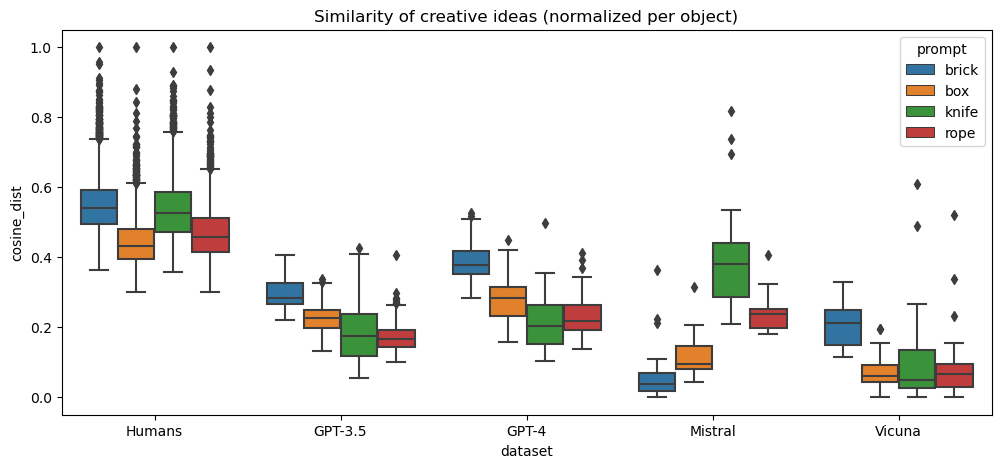

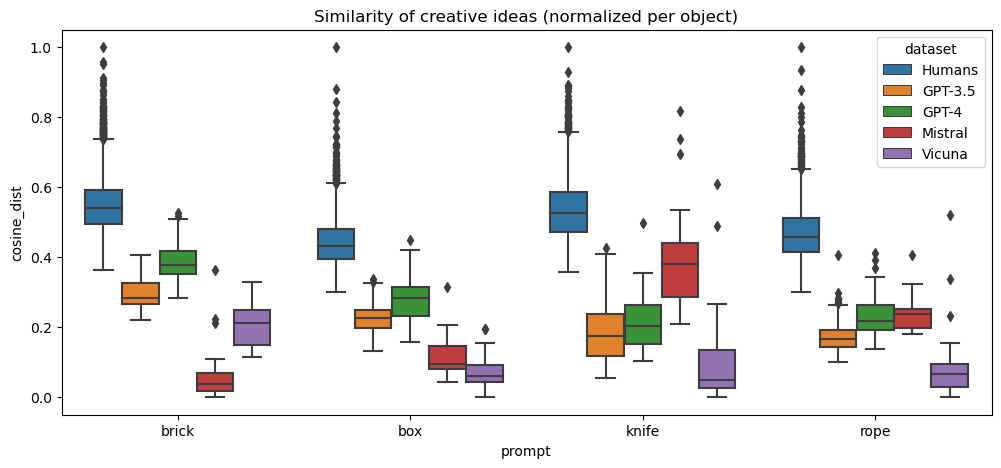

In [17]:
combined_data_norm_per_object = pd.concat([brick_norm, box_norm, knife_norm, rope_norm])

plt.figure(figsize=(12, 5))
sns.boxplot(data=combined_data_norm_per_object, x='dataset', y='cosine_dist', hue = 'prompt')
plt.title("Similarity of creative ideas (normalized per object)")
plt.show()
plt.figure(figsize=(12, 5))
sns.boxplot(data=combined_data_norm_per_object, x='prompt', y='cosine_dist', hue = 'dataset')
plt.title("Similarity of creative ideas (normalized per object)")
plt.show()

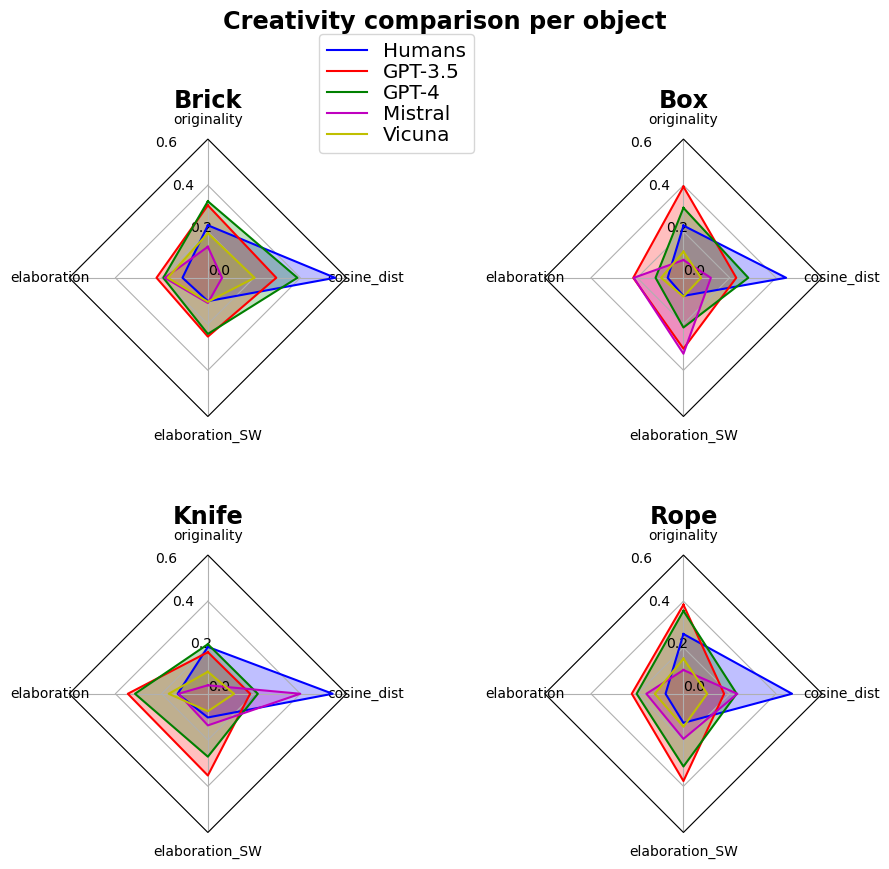

In [18]:
# List of dataframes and corresponding titles
features = ["originality", "elaboration", "elaboration_SW", "cosine_dist"]
dataframes = [brick_norm, box_norm, knife_norm, rope_norm]
titles = ['Humans', 'GPT-3.5', 'GPT-4', 'Mistral', 'Vicuna']

radar_charts_per_object(brick_norm, box_norm, knife_norm, rope_norm, features)

# Radar charts per model

Question: 
- Are humans and LLMs more creative depending on the object ? What similarities and differences do they have ?
- Given a model, does the model performs differently depending on the object? And how ? (along which dimensions ?)

In [19]:
# normalize for each model across all objects
features = ["originality", "elaboration", "elaboration_SW", "cosine_dist"]

humans_norm = normalization_per_model(humans)
gpt_35_norm = normalization_per_model(gpt_35_100)
gpt_4_norm = normalization_per_model(gpt_4_100)
mistral_norm = normalization_per_model(mistral)
vicuna_norm = normalization_per_model(vicuna)

# List of dataframes and corresponding titles
dataframes = [humans_norm[features], gpt_35_norm[features], gpt_4_norm[features], mistral_norm[features], vicuna_norm[features]]
titles = ['Humans', 'GPT-3.5', 'GPT-4', 'Mistral', 'Vicuna']

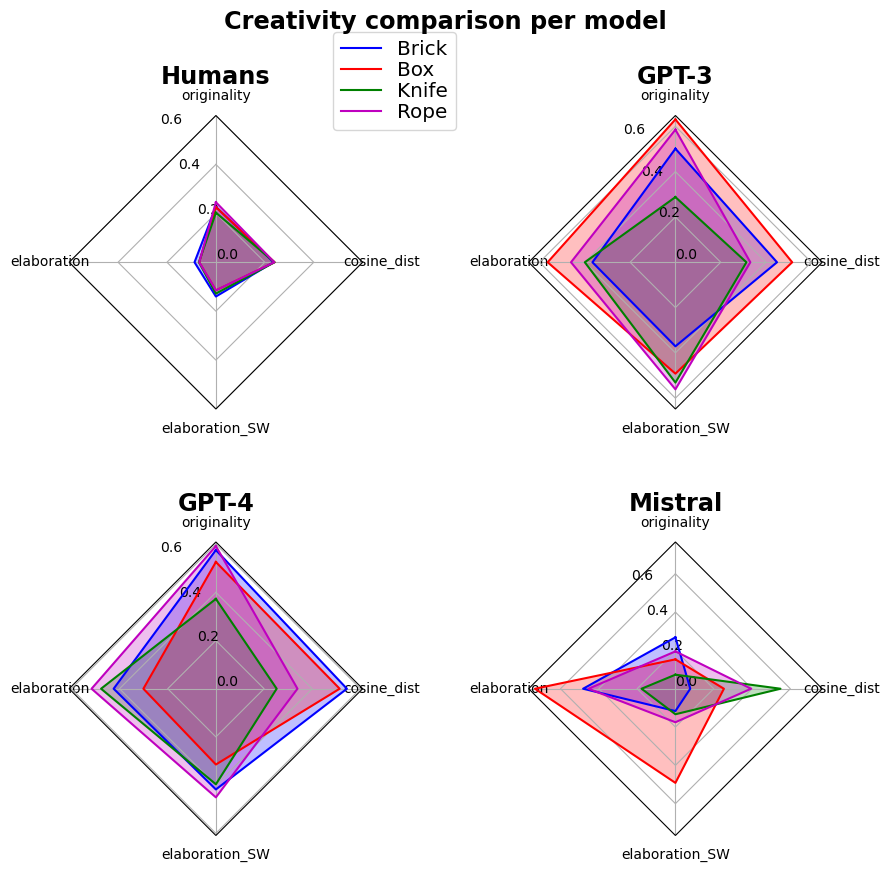

In [23]:
# dimensions to plot
features_to_plot = ["originality", "elaboration", "elaboration_SW", "cosine_dist"]
#features_to_plot = ["originality", "elaboration", "elaboration_SW"]

radar_charts_per_model(humans_norm, gpt_35_norm, gpt_4_norm, mistral_norm, vicuna_norm, features_to_plot)

## POS tagging

In [8]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
df_pos = compute_pos_tagging(combined_data)

100%|██████████| 94/94 [00:00<00:00, 1494.14it/s]


POS tagging: [ 4.83286299 11.54798762  9.68055556  8.36666667  6.23404255]
Ground truth: [4.699044151115157, 10.526315789473685, 8.636111111111111, 8.0, 6.23404255319149]


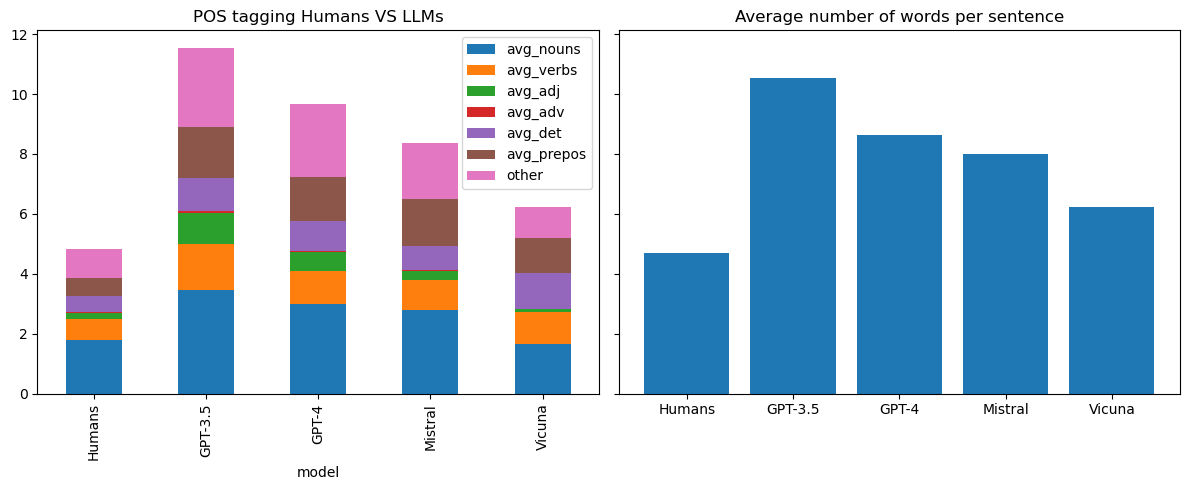

In [8]:
plot_POS(combined_data, df_pos)

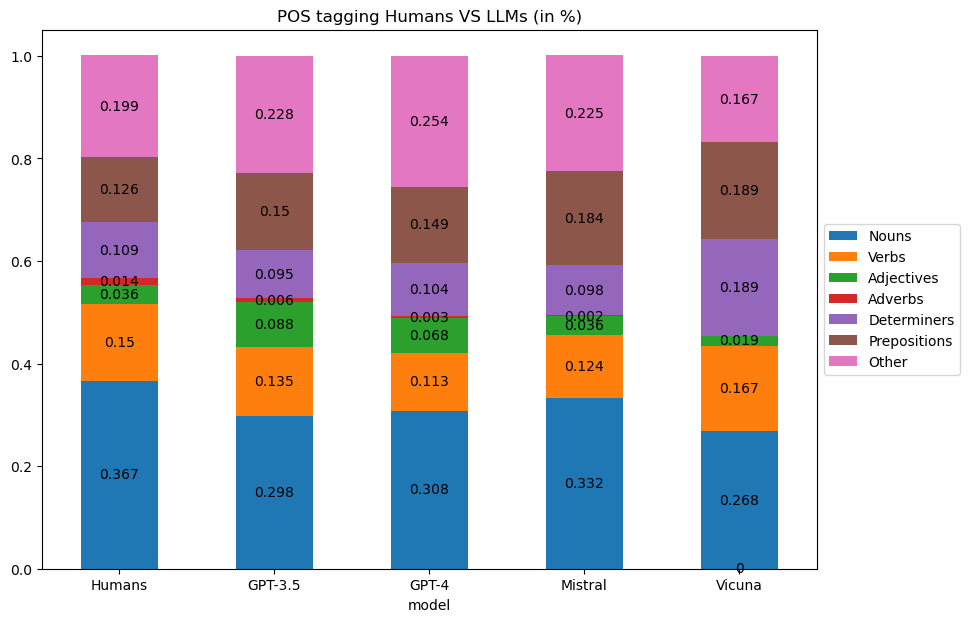

In [9]:
plot_POS_proportions(df_pos)

## Topic modeling

1) On humans data only
2) then comparison between LLMs

In [18]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4')  
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import LdaModel

# import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
combined_data.head()

,prompt,response,originality,elaboration,cosine_dist,elaboration_SW,dataset
0,rope,use it to tie up a bicycle,1.9,7.0,0.238301,3,Humans
1,rope,steps,1.3,1.0,0.277273,1,Humans
2,rope,dog toy,1.4,2.0,0.257513,2,Humans
3,box,use it to reach something,1.7,5.0,0.273910,3,Humans
4,brick,strength tester (punching),2.7,3.0,0.294817,5,Humans


In [20]:
# clean text
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

def create_lda_model(df, object, num_topics):
    # create corpus
    texts = [sent for sent in df[df['prompt'] == object]['response']]

    clean_texts = [clean(text).split() for text in texts]
    print(f"Number of documents in corpus for object \"{object}\": {len(clean_texts)}")
    
    # Creating dictionary
    dictionary = corpora.Dictionary(clean_texts)
    # create term document frequency
    corpus = [dictionary.doc2bow(text) for text in clean_texts]
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=num_topics, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
    
    return lda_model

#def assign_topic(sentence, keywords, topic_idx):
#
#    if any(word in sentence for word in keywords):
#        return topic_idx
#    else:
#        return None
    


In [75]:
num_topics = 3

# generate LDA model for each object
lda_model_brick = create_lda_model(humans, 'brick', num_topics=num_topics)
lda_model_box = create_lda_model(humans, 'box', num_topics=num_topics)
lda_model_knife = create_lda_model(humans, 'knife', num_topics=num_topics)
lda_model_rope = create_lda_model(humans, 'rope', num_topics=num_topics)

lda_model_list = [lda_model_brick, lda_model_box, lda_model_knife, lda_model_rope]

humans_topic,  perplexity, coherence_score = assign_topic_all(humans, lda_model_list, print_keywords = True, num_topics = num_topics)
#plot_originality_per_topic(humans, lda_model_list, model = "Humans", print_keywords = True, num_topics = num_topics)

Number of documents in corpus for object "brick": 4056


Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Object: brick, Topic 1, Keywords: ['make', 'weight', 'brick', 'used', 'could']
Object: brick, Topic 2, Keywords: ['use', 'put', 'keep', 'window', 'stand']
Object: brick, Topic 3, Keywords: ['something', 'hold', 'build', 'car', 'throw']


Object: box, Topic 1, Keywords: ['use', 'put', 'pencil', 'box', 'hide']
Object: box, Topic 2, Keywords: ['make', 'tower', 'design', 'house', 'cut']
Object: box, Topic 3, Keywords: ['holder', 'wall', 'play', 'build', 'table']


Object: knife, Topic 1, Keywords: ['use', 'cut', 'thing', 'open', 'hair']
Object: knife, Topic 2, Keywords: ['knife', 'wall', 'paint', 'used', 'tree']
Object: knife, Topic 3, Keywords: ['something', 'make', 'carve', 'cutting', 'wood']


Object: rope, Topic 1, Keywords: ['use', 'tie', 'something', 'hang', 'around']
Object: rope, Topic 2, Keywords: ['together', 'hair', 'th

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<Axes: xlabel='prompt', ylabel='Count'>

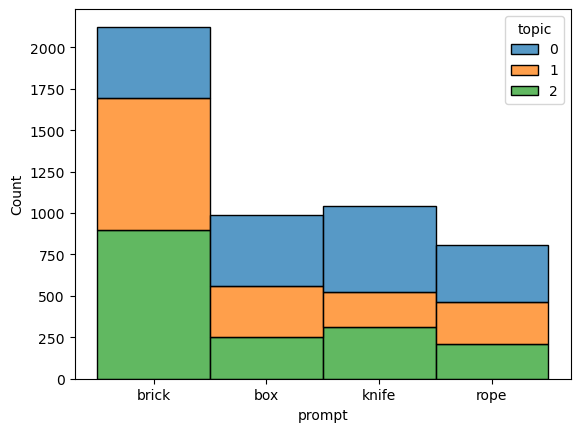

In [76]:
sns.histplot(data = humans_topic, x = 'prompt', hue = 'topic', hue_order = [0, 1, 2], multiple = 'stack')
# add space between bars on x axis

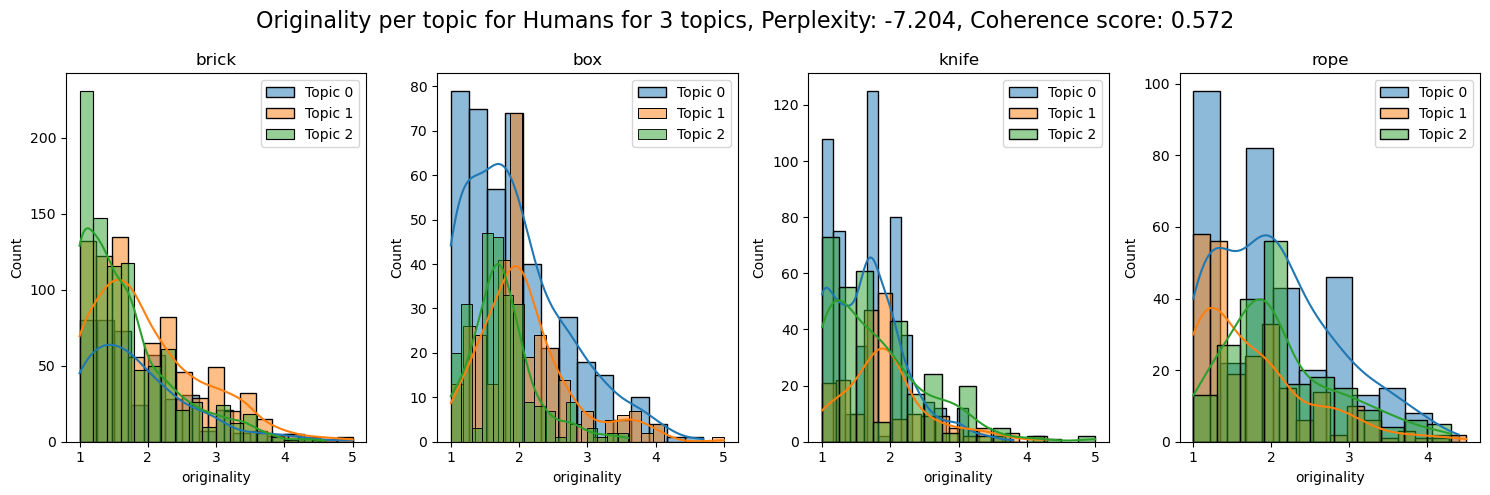

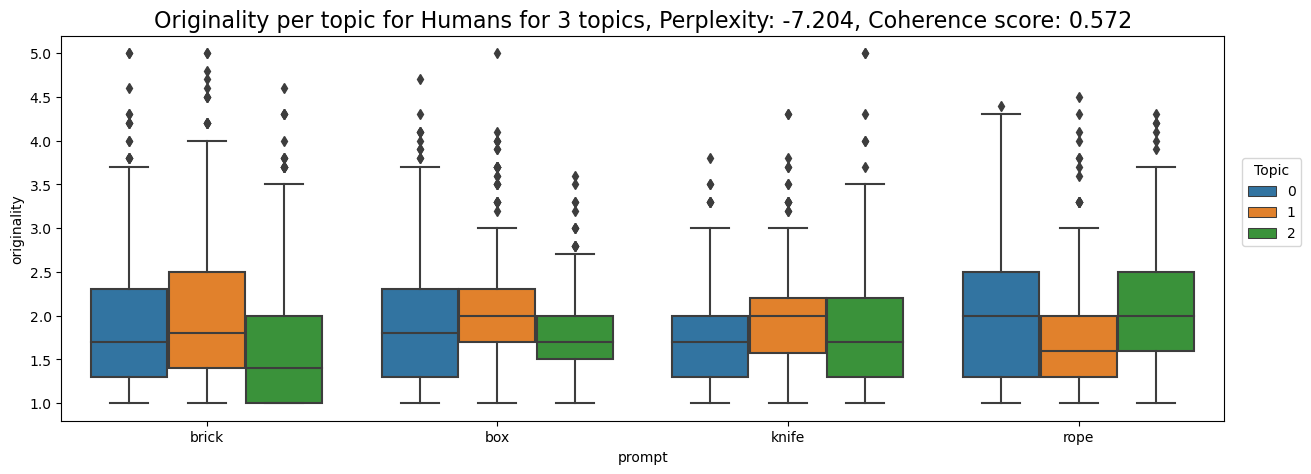

In [78]:
# histplot
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, object in enumerate(objects):
    for j in range(num_topics):
        sns.histplot(data=humans_topic[(humans_topic['prompt'] == object) & (humans_topic['topic'] == j)], x = 'originality', kde = True, ax=axs[i], label = f"Topic {j}")
    axs[i].set_title(f"{object}")
    axs[i].legend()
plt.suptitle(f"Originality per topic for Humans for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)
plt.tight_layout()
plt.show()

# boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=humans_topic, x='prompt', y='originality', hue = 'topic', hue_order = [0, 1, 2])
#plt.title("Originality per topic")
plt.title(f"Originality per topic for Humans for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)

plt.legend(title = 'Topic', bbox_to_anchor=(1.01, 0.7), loc='upper left')
plt.show()

In [69]:
num_topics = 3
# generate LDA model for each object
lda_model_brick = create_lda_model(gpt_4_100, 'brick', num_topics=num_topics)
lda_model_box = create_lda_model(gpt_4_100, 'box', num_topics=num_topics)
lda_model_knife = create_lda_model(gpt_4_100, 'knife', num_topics=num_topics)
lda_model_rope = create_lda_model(gpt_4_100, 'rope', num_topics=num_topics)

lda_model_list = [lda_model_brick, lda_model_box, lda_model_knife, lda_model_rope]

gpt4_topic,  perplexity, coherence_score = assign_topic_all(gpt_4_100, lda_model_list, print_keywords = True, num_topics = num_topics)
#plot_originality_per_topic(gpt_4_100, lda_model_list, model = "GPT-4", print_keywords = True, num_topics = num_topics)

Number of documents in corpus for object "brick": 93


Number of documents in corpus for object "box": 91
Number of documents in corpus for object "knife": 87
Number of documents in corpus for object "rope": 89
Object: brick, Topic 1, Keywords: ['use', 'project', 'garden', 'implement', 'base']
Object: brick, Topic 2, Keywords: ['use', 'rustic', 'cloth', 'base', 'stack']
Object: brick, Topic 3, Keywords: ['use', 'create', 'simple', 'outdoor', 'base']


Object: box, Topic 1, Keywords: ['use', 'make', 'craft', 'box', 'turn']
Object: box, Topic 2, Keywords: ['use', 'turn', 'create', 'box', 'construct']
Object: box, Topic 3, Keywords: ['build', 'use', 'develop', 'simple', 'basic']


Object: knife, Topic 1, Keywords: ['utilize', 'use', 'tool', 'make', 'employ']
Object: knife, Topic 2, Keywords: ['use', 'employ', 'tool', 'make', 'turn']
Object: knife, Topic 3, Keywords: ['employ', 'utilize', 'use', 'tool', 'makeshift']


Object: rope, Topic 1, Keywords: ['use', 'knot', 'weave', 'around', 'rustic']
Object: rope, Topic 2, Keywords: ['create', 'line

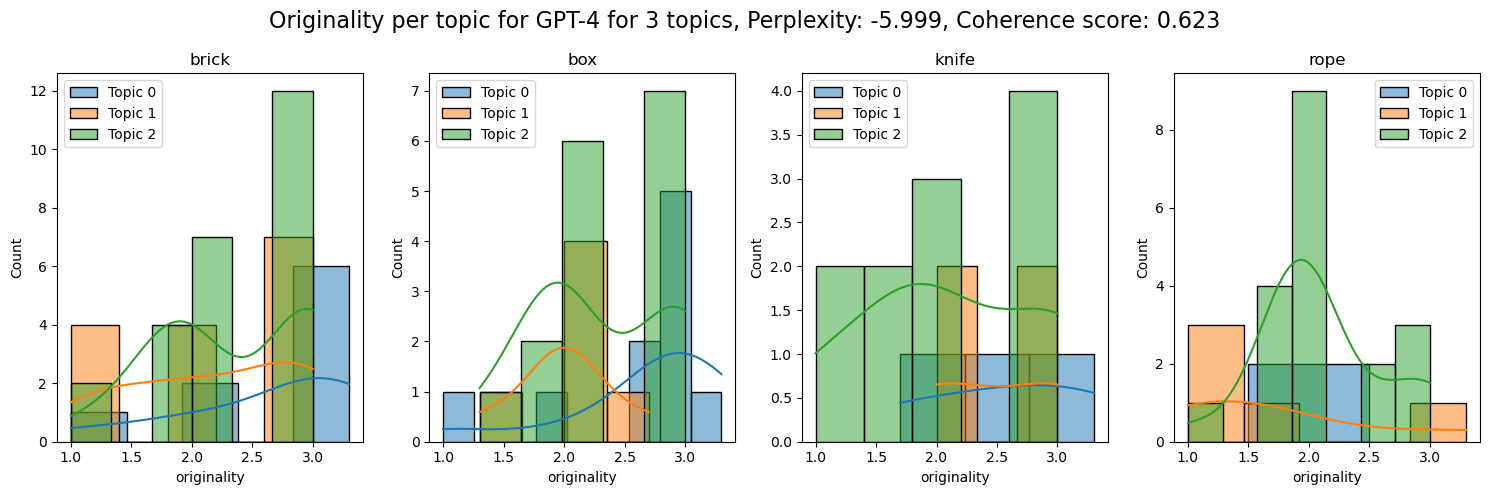

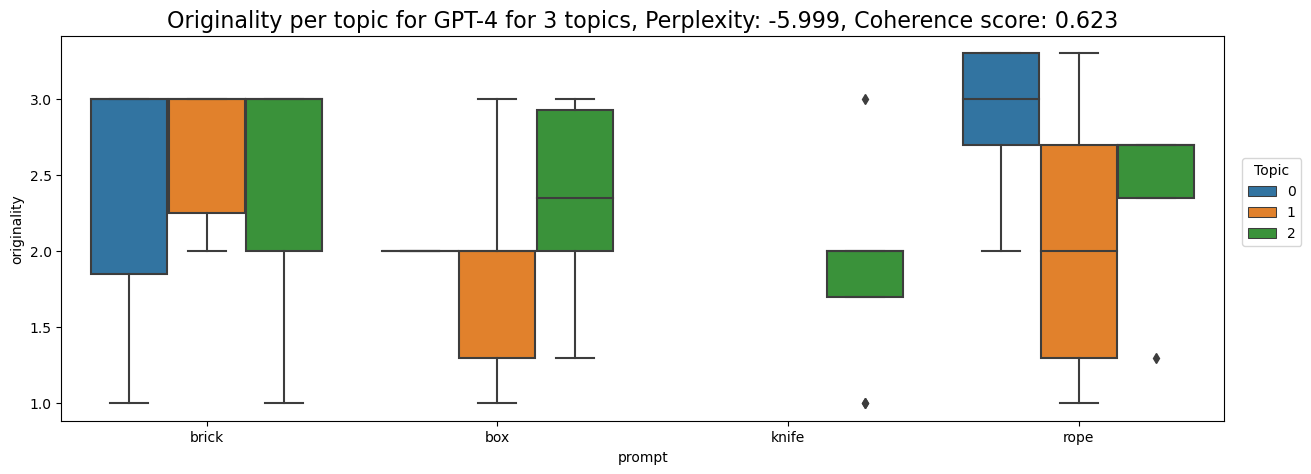

In [71]:
# histplot
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, object in enumerate(objects):
    for j in range(num_topics):
        sns.histplot(data=gpt4_topic[(humans_topic['prompt'] == object) & (gpt4_topic['topic'] == j)], x = 'originality', kde = True, ax=axs[i], label = f"Topic {j}")
    axs[i].set_title(f"{object}")
    axs[i].legend()
plt.suptitle(f"Originality per topic for GPT-4 for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)
plt.tight_layout()
plt.show()

# boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=gpt4_topic, x='prompt', y='originality', hue = 'topic', hue_order = [0, 1, 2])
#plt.title("Originality per topic")
plt.title(f"Originality per topic for GPT-4 for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)

plt.legend(title = 'Topic', bbox_to_anchor=(1.01, 0.7), loc='upper left')
plt.show()

In [72]:
num_topics = 3

# generate LDA model for each object
lda_model_brick = create_lda_model(gpt_35_100, 'brick', num_topics=num_topics)
lda_model_box = create_lda_model(gpt_35_100, 'box', num_topics=num_topics)
lda_model_knife = create_lda_model(gpt_35_100, 'knife', num_topics=num_topics)
lda_model_rope = create_lda_model(gpt_35_100, 'rope', num_topics=num_topics)

lda_model_list = [lda_model_brick, lda_model_box, lda_model_knife, lda_model_rope]

gpt35_topic,  perplexity, coherence_score = assign_topic_all(gpt_35_100, lda_model_list, print_keywords = True, num_topics = num_topics)
#plot_originality_per_topic(gpt_35_100, lda_model_list, model = "GPT-3.5", print_keywords = True, num_topics = num_topics)

Number of documents in corpus for object "brick": 77


Number of documents in corpus for object "box": 86
Number of documents in corpus for object "knife": 78
Number of documents in corpus for object "rope": 82
Object: brick, Topic 1, Keywords: ['build', 'use', 'garden', 'small', 'stand']
Object: brick, Topic 2, Keywords: ['use', 'diy', 'support', 'door', 'make']
Object: brick, Topic 3, Keywords: ['unique', 'holder', 'create', 'turn', 'use']


Object: box, Topic 1, Keywords: ['use', 'base', 'creating', 'diy', 'portable']
Object: box, Topic 2, Keywords: ['cut', 'repurpose', 'use', 'diy', 'makeshift']
Object: box, Topic 3, Keywords: ['turn', 'convert', 'repurpose', 'base', 'use']


Object: knife, Topic 1, Keywords: ['use', 'cut', 'carve', 'design', 'intricate']
Object: knife, Topic 2, Keywords: ['use', 'project', 'slice', 'small', 'create']
Object: knife, Topic 3, Keywords: ['create', 'cutting', 'use', 'paper', 'plant']


Object: rope, Topic 1, Keywords: ['fashion', 'make', 'sturdy', 'unique', 'strap']
Object: rope, Topic 2, Keywords: ['secu

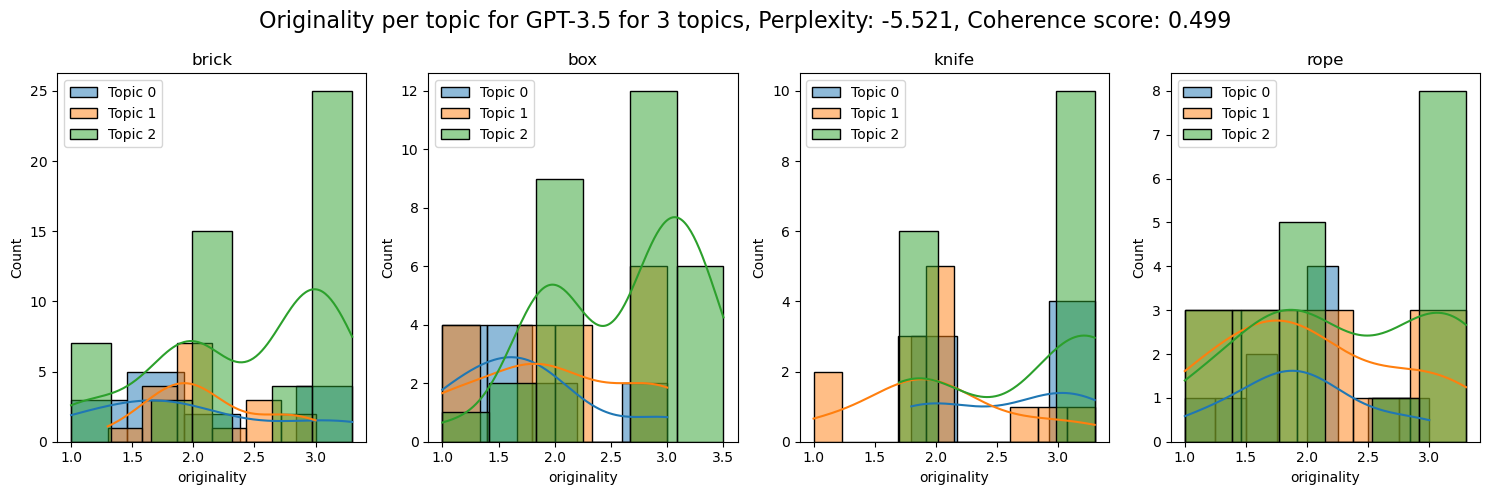

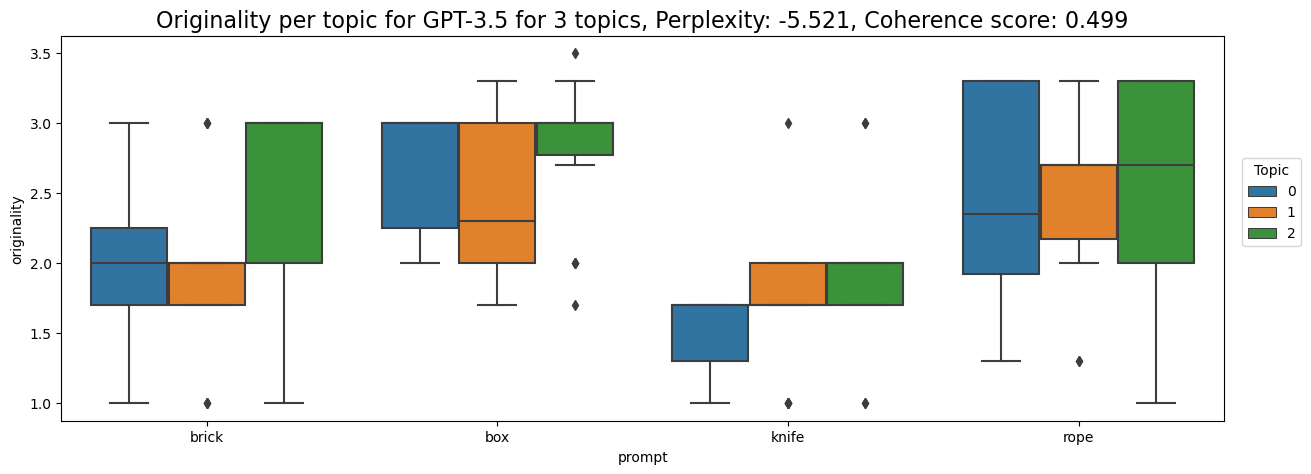

In [74]:
# histplot
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, object in enumerate(objects):
    for j in range(num_topics):
        sns.histplot(data=gpt35_topic[(humans_topic['prompt'] == object) & (gpt35_topic['topic'] == j)], x = 'originality', kde = True, ax=axs[i], label = f"Topic {j}")
    axs[i].set_title(f"{object}")
    axs[i].legend()
plt.suptitle(f"Originality per topic for GPT-3.5 for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)
plt.tight_layout()
plt.show()

# boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=gpt35_topic, x='prompt', y='originality', hue = 'topic', hue_order = [0, 1, 2])
#plt.title("Originality per topic")
plt.title(f"Originality per topic for GPT-3.5 for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)

plt.legend(title = 'Topic', bbox_to_anchor=(1.01, 0.7), loc='upper left')
plt.show()

### Visualize topic modeling

In [34]:
visu_with_pyldavis(lda_model_brick, gpt_35_100, object = 'brick')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.089926  0.052281       1        1  44.907896
2      0.008432 -0.092178       2        1  30.702880
1     -0.098358  0.039897       3        1  24.389224, topic_info=       Term       Freq      Total Category  logprob  loglift
32    build   9.000000   9.000000  Default  30.0000  30.0000
8    unique  11.000000  11.000000  Default  29.0000  29.0000
29    table   5.000000   5.000000  Default  28.0000  28.0000
2       use  17.000000  17.000000  Default  27.0000  27.0000
28  support   4.000000   4.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
19     turn   1.485541  10.556617   Topic3  -4.2639  -0.5499
35    small   0.956872   8.821750   Topic3  -4.7038  -0.8103
3    create   0.962926  10.625678   Topic3  -4.6975  -0.9900
15   garden   0.950445   8.880988   Topic3  -4.7105  -0.8237
74  kitchen   0.851700   2.026635   Topic3  -4.8202   0.5441

[174 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
55        3  0.747941  accessory
84        2  0.720596       area
127       1  0.351766    artwork
127       2  0.703531    artwork
56        3  0.747938     attach
...     ...       ...        ...
2         1  0.401444        use
2         2  0.229397        use
2         3  0.401444        use
124       3  0.747944      video
12        3  0.747938    workout

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [66]:
# LSA model
#lsa = LsiModel(doc_term_frequency , num_topics=3, id2word = dictionary)
# Results
#print(lsa.print_topics(num_topics=3, num_words=3))